In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import PIL
import numpy

##

In [2]:
classes = os.listdir(r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\train")

In [3]:
num_classes = len(classes)

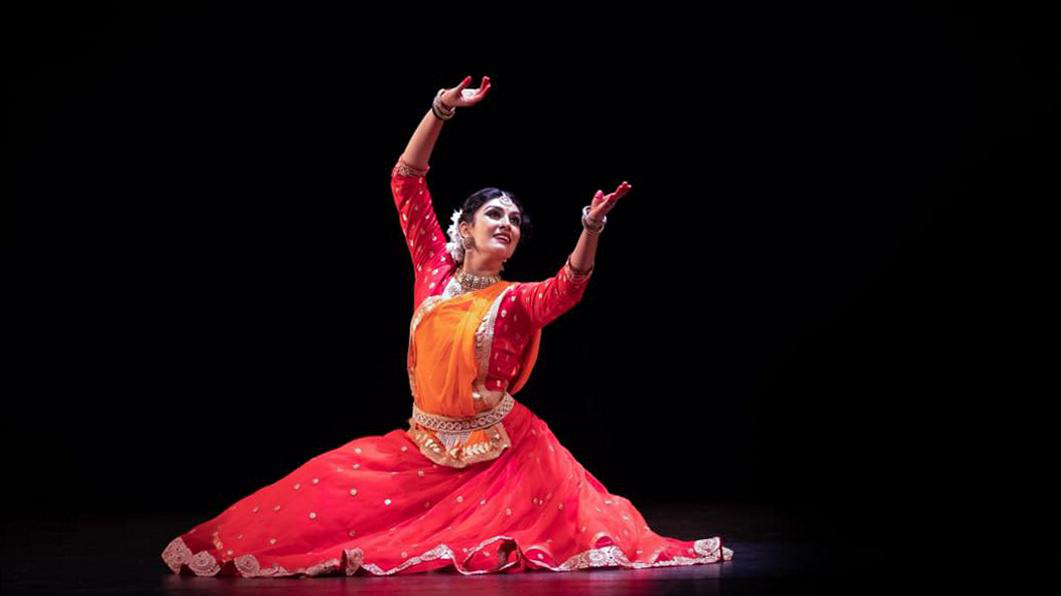

In [4]:
PIL.Image.open(r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\train\kathak\kathak_original_1.jpg_4c663055-85c6-4785-a8b2-ca9b972be7af.jpg")

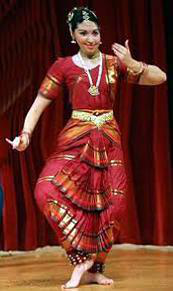

In [5]:
PIL.Image.open(r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\train\kathak\kathak_original_58.jpg_2b6c496e-5800-49b8-a51b-1333ce7703b2.jpg")

In [6]:

image = PIL.Image.open(r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\test\80.jpg")
print(image.size)  # The size of an image is 275 x 183

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                           horizontal_flip=True, rotation_range=20,
                                                           shear_range=0.2, zoom_range=0.2)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batch = train_datagen.flow_from_directory(
    r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\train", 
    target_size=(128, 128),
    class_mode='sparse', # it will get us label as a single integer value\
    batch_size=64,
    shuffle=True,
    color_mode='rgb',
    classes=classes
)

val_batch = val_datagen.flow_from_directory(
    r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\validation", 
    target_size=(128, 128),
    class_mode='sparse', # it will get us label as a single integer value\
    batch_size=64,
    shuffle=False,
    color_mode='rgb',
    classes=classes
)

test_batch = test_datagen.flow_from_directory(
    r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\test", 
    target_size=(128, 128),
    class_mode='sparse', # it will get us label as a single integer value\
    batch_size=64,
    shuffle=False,
    color_mode='rgb',
)

(251, 200)
Found 5000 images belonging to 8 classes.
Found 364 images belonging to 8 classes.
Found 0 images belonging to 0 classes.


In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\train",
    class_names=classes, label_mode='int',
    color_mode='rgb', batch_size=64, image_size=(128,
    128), shuffle=True, seed=None, validation_split=None)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\validation",
    class_names=classes, label_mode='int',
    color_mode='rgb', batch_size=64, image_size=(128,
    128), shuffle=False, seed=None, validation_split=None)

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     r"C:\Users\jgaur\Tensorflow_Tut\Image_Classification\indian-classical-dance\dataset\test")

Found 5000 files belonging to 8 classes.
Found 364 files belonging to 8 classes.


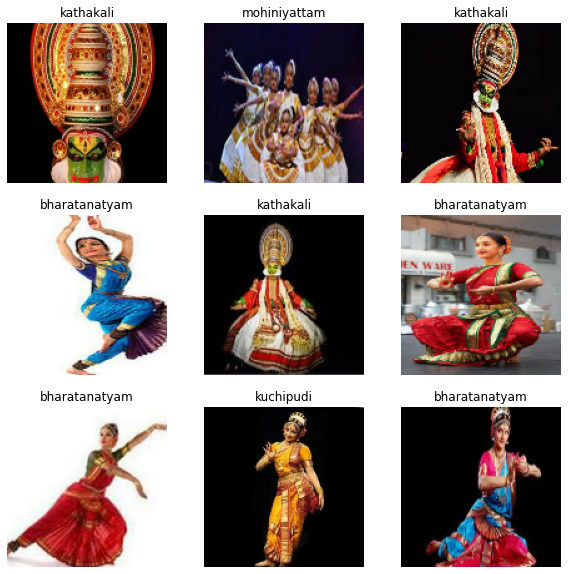

In [8]:
for image, label in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classes[label[i]])
        plt.axis('off')

In [9]:
for image, label in train_ds:
    print(image.shape)
    print(label.shape)
    break

(64, 128, 128, 3)
(64,)


# Normalizing the pixel of the image

In [10]:
normalize_layer = keras.layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
normalize_ds = train_ds.map(lambda x, y: (normalize_layer(x), y))

In [12]:
# image, label = next(iter(normalize_ds))
# first_image = image[0]
# print(numpy.min(first_image), numpy.max(first_image))

for image, label in normalize_ds.take(1):
    print(numpy.min(image), numpy.max(image))
    break

0.0 1.0


In [13]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(128, 128, 3)),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.RandomRotation(0.1)
])

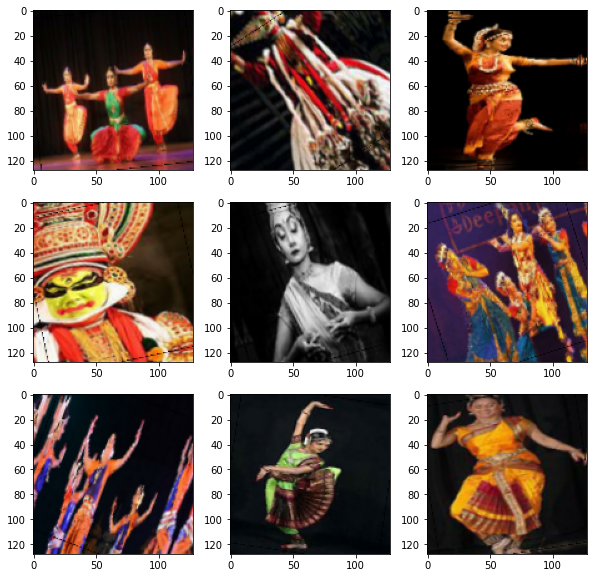

In [14]:
plt.figure(figsize=(10, 10))
for image, label in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(image)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[i].numpy().astype('uint8'))

In [15]:
model = keras.models.Sequential([
    data_augmentation,
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128, 128, 3)),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2), 
    keras.layers.Flatten(),
    keras.layers.Dense(256),
    keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 128, 128, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)      

In [16]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

In [17]:
epochs = 15
callbacks = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2
)

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[callbacks], verbose=2)

Epoch 1/15
79/79 - 310s - loss: 1.8432 - accuracy: 0.3612 - val_loss: 1.5679 - val_accuracy: 0.4176
Epoch 2/15
79/79 - 195s - loss: 1.2720 - accuracy: 0.5618 - val_loss: 1.2800 - val_accuracy: 0.5577
Epoch 3/15
79/79 - 192s - loss: 1.0215 - accuracy: 0.6522 - val_loss: 1.0314 - val_accuracy: 0.6401
Epoch 4/15
79/79 - 193s - loss: 0.8418 - accuracy: 0.7150 - val_loss: 0.7898 - val_accuracy: 0.7280
Epoch 5/15
79/79 - 193s - loss: 0.6998 - accuracy: 0.7642 - val_loss: 0.5957 - val_accuracy: 0.7830
Epoch 6/15
79/79 - 195s - loss: 0.5409 - accuracy: 0.8168 - val_loss: 0.4826 - val_accuracy: 0.8434
Epoch 7/15
79/79 - 196s - loss: 0.5359 - accuracy: 0.8198 - val_loss: 0.5183 - val_accuracy: 0.8022
Epoch 8/15
79/79 - 191s - loss: 0.3844 - accuracy: 0.8724 - val_loss: 0.3320 - val_accuracy: 0.8819
Epoch 9/15
79/79 - 194s - loss: 0.3356 - accuracy: 0.8924 - val_loss: 0.3234 - val_accuracy: 0.8764
Epoch 10/15
79/79 - 192s - loss: 0.2827 - accuracy: 0.9014 - val_loss: 0.2225 - val_accuracy: 0.9203

[]

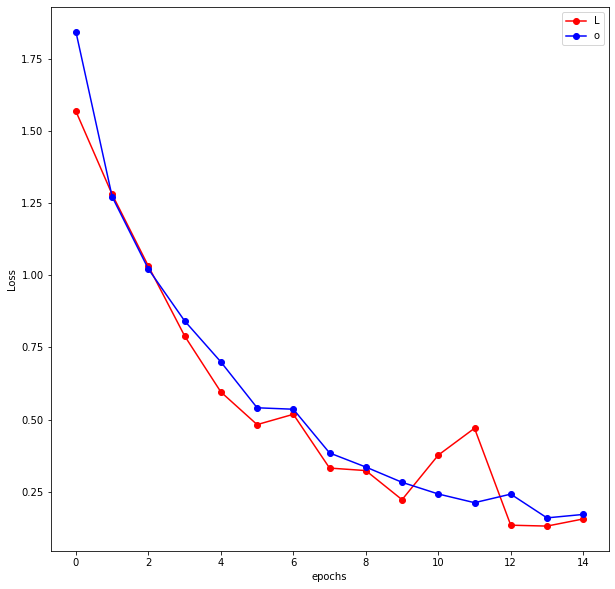

In [28]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']

plt.figure(figsize=(10, 10))
plt.plot(val_loss, 'r-o', label='validation_loss')
plt.plot(train_loss, 'b-o', label='train_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend('Loss vs No. of epochs')
plt.plot()

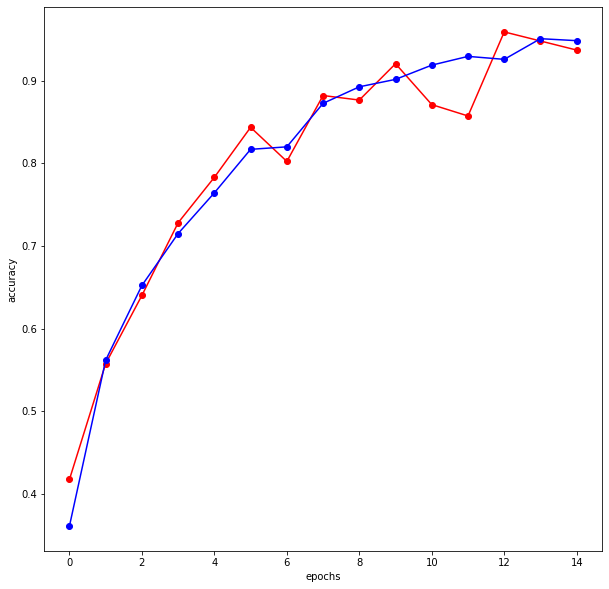

In [31]:
train_acc = history.history['accuracy']

plt.figure(figsize=(10, 10))
plt.plot(val_acc, 'r-o', label='val_accuracy')
plt.plot(train_acc, 'b-o', label='train_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()